# Capstone Module 2: Attracting Backpackers accomodation segment in Bangkok

## `Objective`: 
### Researching the best strategy to attracts backpacking's accomodation segment in Bangkok using data driven approach

## Created by: Yonathan Hary Hutagalung
# Data Structure
**`I. Data understanding`**

**`II.Data Cleaning`**
- Part 1 Handling Missing Value, Duplicates, and Wrong data types
- Part 2 Outlier Handling
- Part 3 Adding new useful column

**`III. Data Analysis`**
- Numerical
- Categorical

**`IV. Data Visualization`**
- Distribution of data (Histogram)
- Proportion of categorical data (Pie Chart)
- Geographic visualization (Scatterplot)
- Quantitative vs Qualitative Analysis (Grouped Bar Chart and Countplot)
- Scatterplot and reg plot for price and reviews to see corelation

**`V. Business Analysis`**

`Question 1: Pricing strategy`

- How does price relate to booking success?
- Which price segment attracts more reviews?
- Price differences by room_type and neighborhood?

`Question 2: Geographic competition`

- Which neighbourhoods have the most listings and highest average prices?
- Which neighbourhoods have the highest booking frequency?
- Correlation between location and review count

`Question 3: Market Competition`

- Do hosts with multiple listings tends to get more review?
- What is the proportion of high reviews segment and low review segment across different type of rooms??
- Do minimum night policy resulting in fewer reviews?
- Do highly available listings get fewer reviews?

**`VI. Conclusion`**

`-------------------------------------------------------------------------------------------------------------------------------------------------------------`

## `I. Data Understanding`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')

In [3]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [4]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


### Check Null value

In [5]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [6]:
#Null Value wrangling
df[df['name'].isnull() | df['host_name'].isnull()]


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [7]:
## For last review and reviews per month is null because there is no review hence we should count how many listing has no review
df[df['number_of_reviews'] == 0].count()

Unnamed: 0                        5790
id                                5790
name                              5784
host_id                           5790
host_name                         5790
neighbourhood                     5790
latitude                          5790
longitude                         5790
room_type                         5790
price                             5790
minimum_nights                    5790
number_of_reviews                 5790
last_review                          0
reviews_per_month                    0
calculated_host_listings_count    5790
availability_365                  5790
number_of_reviews_ltm             5790
dtype: int64

### Check duplications

In [8]:
#Check duplicated id
df['id'].duplicated().sum()

0

In [9]:
#Check duplicated name
df['name'].duplicated().sum()

1059

In [10]:
#Check the actual duplicated name
df[df.duplicated('name')]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
294,294,2682899,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.736100,100.570400,Entire home/apt,9999,2,25,2022-12-07,0.24,53,358,2
317,317,3638924,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.737570,100.569940,Entire home/apt,9999,2,24,2022-12-22,0.24,53,359,2
481,481,4625756,Spacious two Bedroom Apartment,5469970,Yair,Suanluang,13.721680,100.618180,Entire home/apt,1662,10,29,2019-02-04,0.30,10,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.775620,100.573460,Private room,1200,1,0,NaN,NaN,1,365,0
551,551,4753611,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.736650,100.569830,Entire home/apt,9999,2,19,2017-05-29,0.20,53,360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,15848,790460476887978054,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.752904,100.540381,Private room,1400,1,0,NaN,NaN,14,357,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


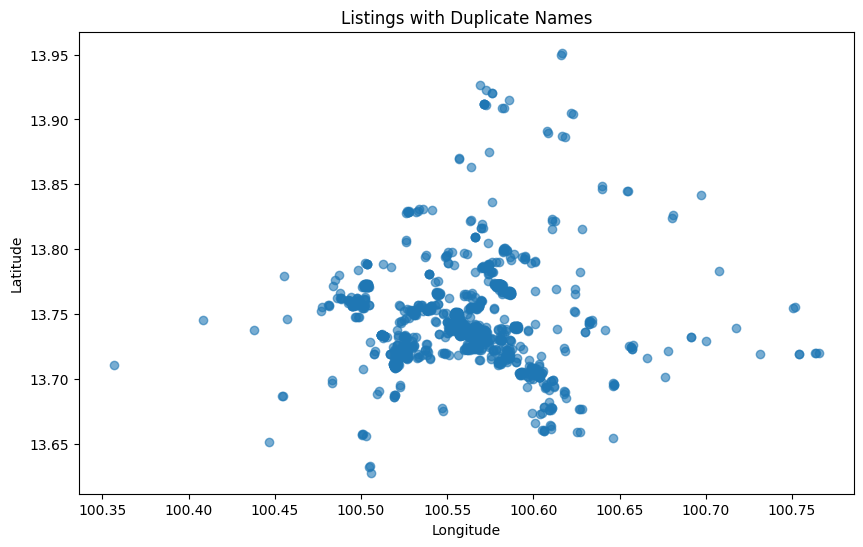

In [11]:
## We have 1059 duplicated name but is it in the same location?
duplicates = df[df.duplicated(subset=['name'], keep=False)]
plt.figure(figsize=(10,6))
plt.scatter(duplicates['longitude'], duplicates['latitude'], alpha=0.6)
plt.title('Listings with Duplicate Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Check wrong dtypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

## `II. Data Cleaning`

## Data Cleaning part 1: cleaning missing value, dtypes, filling, and duplicates
initial data row count: 15853

### Needs to be updated
- For name and host name, some data could be used. Hence we decided to put it unknown instead!
- Deleting the rows that does not have any reviews because we could not analyse it
- We do not delete the duplicated names because the location seems different and it might be an SEO decision to make same name and some of it has more than 1 rooms
- last_review dtype should changed into timeframe instead
- Deleting Unnamed:0 columns

In [13]:
#Begin by filling the missing value so not all of it deleted
df['name'].fillna('No name', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

In [14]:
#Delete missing value which means reviews = 0
df.dropna(inplace=True)

In [15]:
#replacing last_review column dtype to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [16]:
#delete column unnamed:1 and reset_index
df.drop('Unnamed: 0', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10064 non-null  int64         
 1   name                            10064 non-null  object        
 2   host_id                         10064 non-null  int64         
 3   host_name                       10064 non-null  object        
 4   neighbourhood                   10064 non-null  object        
 5   latitude                        10064 non-null  float64       
 6   longitude                       10064 non-null  float64       
 7   room_type                       10064 non-null  object        
 8   price                           10064 non-null  int64         
 9   minimum_nights                  10064 non-null  int64         
 10  number_of_reviews               10064 non-null  int64         
 11  la

In [18]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [19]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
2,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
3,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0
4,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0


In [20]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.006400e+04,1.006400e+04,10064.000000,10064.000000,1.006400e+04,10064.000000,10064.000000,10064,10064.000000,10064.000000,10064.000000,10064.000000
mean,1.304525e+17,1.349327e+08,13.743083,100.558637,3.099757e+03,12.913752,26.235592,2021-08-30 08:37:49.316375552,0.813145,17.022953,230.434420,5.484499
min,2.793400e+04,5.892000e+04,13.600390,100.333770,2.950000e+02,1.000000,1.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,1.959214e+07,3.186012e+07,13.720329,100.530685,9.000000e+02,1.000000,2.000000,2020-02-20 00:00:00,0.120000,2.000000,118.000000,0.000000
50%,3.297523e+07,9.739724e+07,13.737460,100.559435,1.390000e+03,2.000000,8.000000,2022-10-24 00:00:00,0.435000,6.000000,272.000000,2.000000
75%,4.626833e+07,2.149848e+08,13.756171,100.581940,2.229000e+03,7.000000,28.000000,2022-12-08 00:00:00,1.060000,18.000000,352.000000,6.000000
max,7.888419e+17,4.911291e+08,13.953540,100.853590,1.014758e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.703158e+17,1.215444e+08,0.039639,0.045522,2.692418e+04,42.841853,48.446789,NaN,1.090196,35.538066,125.794406,10.689922


## Data Cleaning Part 2: Outlier Handling
cleaning summary: 15853 to 10063 rows

`Objective`: Deleting Extremes for each numerical value whether it is discrete or continous. We do not want to delete all outlier since it will make our data significantly lower

`Price column handling`

In [21]:
## Detecting outliers for price. we should consider that price must be associated by room type. We will start by describing the data
df['price'].describe()

count    1.006400e+04
mean     3.099757e+03
std      2.692418e+04
min      2.950000e+02
25%      9.000000e+02
50%      1.390000e+03
75%      2.229000e+03
max      1.014758e+06
Name: price, dtype: float64

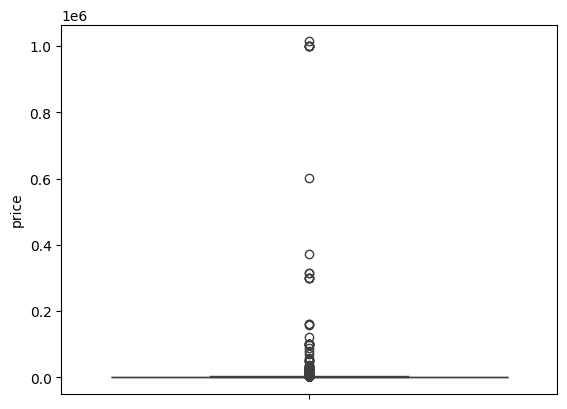

In [22]:
## Price boxplot
sns.boxplot(df['price'])
plt.show()

### In bangkok Budget friendly travellers tends to spend less than 2000 THB (62USD) on Accomodation according to TripAdvisor

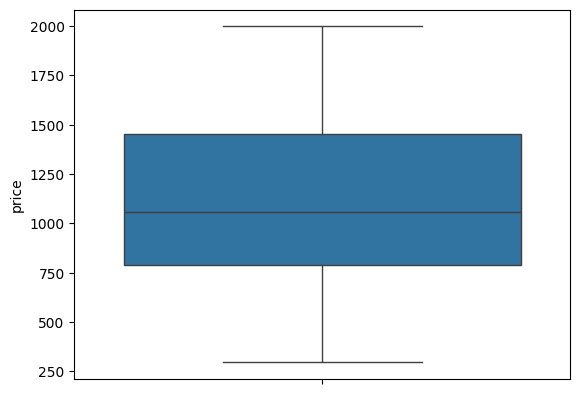

In [23]:
## Filter price point to 2000THB
df = df[df['price'] < 2000]
sns.boxplot(df['price'])
plt.show()

`Availability data handling`

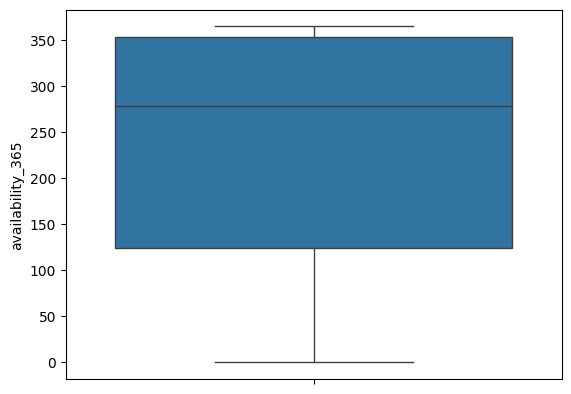

In [24]:
#Check an outliers using boxplot graph of availibility
sns.boxplot(df['availability_365'])
plt.show()

In [25]:
#When the availability is 0, it would not be useful for the data. Hence, we will delete it
df.drop(df[df['availability_365'] == 0].index, inplace=True)

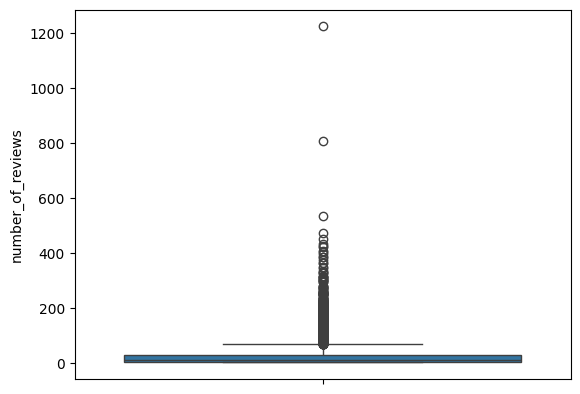

In [26]:
#check the box plot of number of reviews
sns.boxplot(df['number_of_reviews'])
plt.show()

`Number of review last 12 months handling`

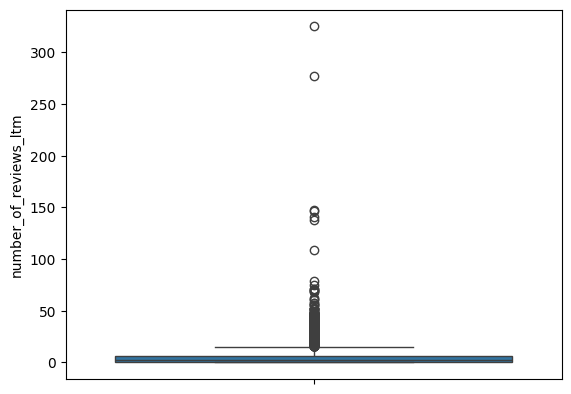

In [27]:
#Check number of review last twelve months
sns.boxplot(df['number_of_reviews_ltm'])
plt.show()

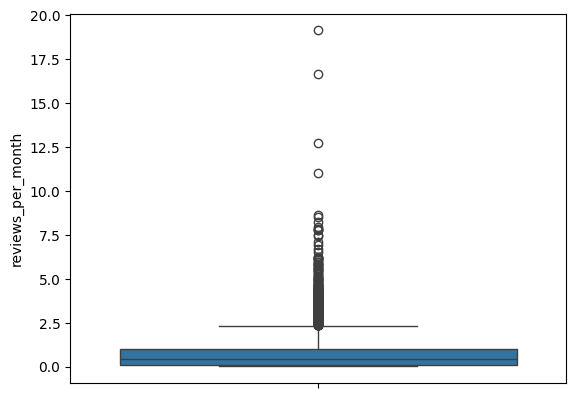

In [28]:
sns.boxplot(df['reviews_per_month'])
plt.show()

In [29]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.619000e+03,6.619000e+03,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619,6619.000000,6619.000000,6619.000000,6619.000000
mean,1.260706e+17,1.324091e+08,13.743828,100.559897,1114.603414,14.542831,26.322254,2021-09-09 11:27:02.420305408,0.763875,14.164980,247.141864,5.089439
min,2.793400e+04,5.892000e+04,13.600390,100.333770,295.000000,1.000000,1.000000,2012-12-15 00:00:00,0.010000,1.000000,1.000000,0.000000
25%,1.808176e+07,3.159355e+07,13.716630,100.528660,790.000000,1.000000,2.000000,2020-02-22 00:00:00,0.110000,2.000000,147.000000,0.000000
50%,3.238897e+07,9.413322e+07,13.736810,100.562330,1080.000000,2.000000,8.000000,2022-10-29 00:00:00,0.420000,5.000000,301.000000,2.000000
75%,4.453535e+07,2.100607e+08,13.759555,100.587550,1466.000000,14.000000,28.000000,2022-12-07 00:00:00,1.000000,15.000000,354.000000,6.000000
max,7.847063e+17,4.911291e+08,13.943430,100.801000,1999.000000,1000.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.666095e+17,1.207606e+08,0.043739,0.048879,419.551712,42.716539,49.547081,NaN,1.012929,28.539999,113.923618,10.310099


### Data Cleaning part 2 Summary
`Data Cleaning decision`: We cap the price to 2000 THB to only measure the budget friendly option. 1000 THB is individual cap for budget travelling according sources online and personal experience, but some of couple backpacking could also double its budget for accomodation

`Column deletion`: From 10064 to 6619 rows

## Data Cleaning part 3: 
### Adding the data for  host type and price point segmentation

Grouping if the host only has one listings or multiple listing

In [30]:
## Adding new column called reviews score and host listing type
host_listing_counts = df.groupby('host_id').size()
df['host_type'] = df['host_id'].map(lambda x: 'Single-listing' if host_listing_counts[x] == 1 else 'Multi-listing')


Creating segmentation based on price point

In [31]:
def segment_price(price):
    if price < 500: #less than 15USD
        return "Low-end Budget"
    elif 500 <= price < 1000: #Less than 30USD
        return "Mid-range Budget"
    else:
        return "Upper-end Budget"
    
df['price_segment'] = df['price'].map(segment_price)

In [32]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.619000e+03,6.619000e+03,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619,6619.000000,6619.000000,6619.000000,6619.000000
mean,1.260706e+17,1.324091e+08,13.743828,100.559897,1114.603414,14.542831,26.322254,2021-09-09 11:27:02.420305408,0.763875,14.164980,247.141864,5.089439
min,2.793400e+04,5.892000e+04,13.600390,100.333770,295.000000,1.000000,1.000000,2012-12-15 00:00:00,0.010000,1.000000,1.000000,0.000000
25%,1.808176e+07,3.159355e+07,13.716630,100.528660,790.000000,1.000000,2.000000,2020-02-22 00:00:00,0.110000,2.000000,147.000000,0.000000
50%,3.238897e+07,9.413322e+07,13.736810,100.562330,1080.000000,2.000000,8.000000,2022-10-29 00:00:00,0.420000,5.000000,301.000000,2.000000
75%,4.453535e+07,2.100607e+08,13.759555,100.587550,1466.000000,14.000000,28.000000,2022-12-07 00:00:00,1.000000,15.000000,354.000000,6.000000
max,7.847063e+17,4.911291e+08,13.943430,100.801000,1999.000000,1000.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.666095e+17,1.207606e+08,0.043739,0.048879,419.551712,42.716539,49.547081,NaN,1.012929,28.539999,113.923618,10.310099


In [33]:
### Valuecounts by segment
df['price_segment'].value_counts()

price_segment
Upper-end Budget    3722
Mid-range Budget    2491
Low-end Budget       406
Name: count, dtype: int64

In [34]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,host_type,price_segment
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Multi-listing,Upper-end Budget
1,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Single-listing,Upper-end Budget
2,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,Multi-listing,Upper-end Budget
3,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0,Single-listing,Upper-end Budget
4,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0,Single-listing,Upper-end Budget


## `III. Data Analysis`

## Summary Statistics

## Numerical Value Summary Statistic

Summary statistic for price per room type

In [35]:
df.groupby('room_type')['price'].agg(['mean','min','median','max'])

,mean,min,median,max
room_type,,,,
Entire home/apt,1197.897646,346,1200.0,1999
Hotel room,1112.105058,318,1089.0,1999
Private room,1013.242140,300,920.0,1999
Shared room,505.168367,295,433.5,1600


Distributions of minimum nights across listings

In [36]:
df.groupby('room_type')['minimum_nights'].agg(['mean','min','median','max'])

,mean,min,median,max
room_type,,,,
Entire home/apt,20.069145,1,3.0,1000
Hotel room,1.840467,1,1.0,113
Private room,6.846082,1,1.0,365
Shared room,1.112245,1,1.0,7


Number of reviews across listings

In [37]:
df['number_of_reviews'].agg(['mean','min','median','max'])

mean        26.322254
min          1.000000
median       8.000000
max       1224.000000
Name: number_of_reviews, dtype: float64

Number of reviews last 12 months across listings

In [38]:
df['number_of_reviews_ltm'].agg(['mean','min','median','max'])

mean        5.089439
min         0.000000
median      2.000000
max       325.000000
Name: number_of_reviews_ltm, dtype: float64

Booking frequency pattern

In [39]:
df['availability_365'].agg(['mean','min','median','max'])

mean      247.141864
min         1.000000
median    301.000000
max       365.000000
Name: availability_365, dtype: float64

How many hosts are in the market?

In [40]:
df['host_id'].nunique()

2829

## Categorical Variable Frequencies

Room type distribution

In [41]:
df['room_type'].value_counts()

room_type
Entire home/apt    4035
Private room       2131
Hotel room          257
Shared room         196
Name: count, dtype: int64

Neighborhood distributions

In [42]:
df['neighbourhood'].value_counts()

neighbourhood
Khlong Toei             979
Vadhana                 693
Ratchathewi             480
Huai Khwang             453
Sathon                  428
Bang Rak                305
Phra Khanong            289
Phra Nakhon             274
Bang Na                 229
Phaya Thai              225
Chatu Chak              223
Din Daeng               204
Suanluang               171
Khlong San              157
Bang Sue                144
Parthum Wan             121
Bang Kapi               108
Bang Phlat               91
Thon buri                89
Don Mueang               82
Lat Krabang              78
Yan na wa                74
Phasi Charoen            72
Bang Kho laen            70
Bangkok Noi              64
Lak Si                   60
Pra Wet                  53
Pom Prap Sattru Phai     50
Bang Khen                47
Samphanthawong           36
Dusit                    35
Bang Khae                29
Chom Thong               28
Wang Thong Lang          26
Rat Burana               26
Bangko

Single or Multi-listing hosts

In [43]:
host_type_counts = df['host_type'].value_counts()
host_type_counts

host_type
Multi-listing     4768
Single-listing    1851
Name: count, dtype: int64

## `IV. Data Visualisation`

## Distribution Visualizations

Price histogram

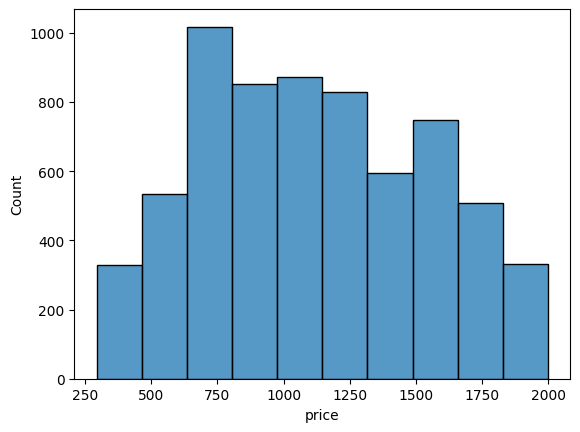

In [44]:
sns.histplot(df['price'], bins=10)
plt.show()

Minimum night histogram

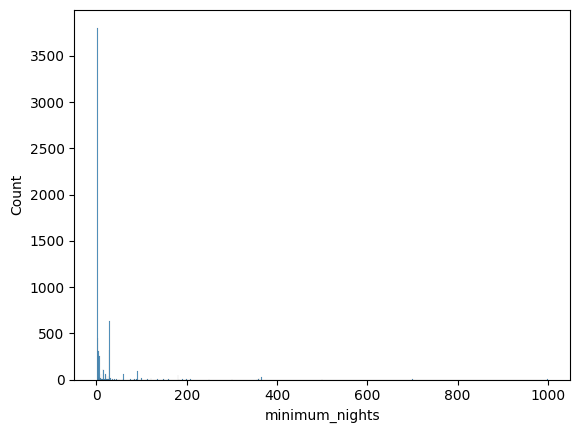

In [45]:
sns.histplot(df['minimum_nights'])
plt.show()

Review histogram

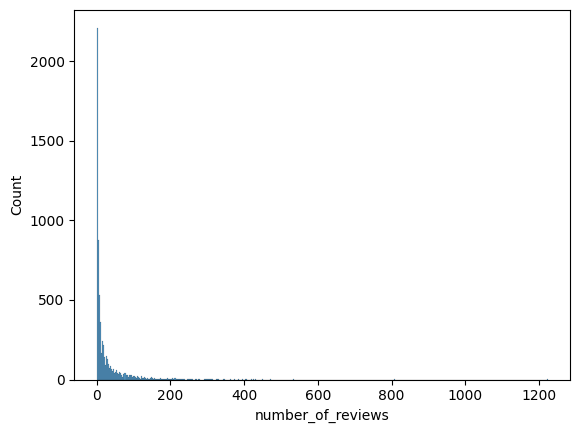

In [46]:
sns.histplot(df['number_of_reviews'])
plt.show()

Number of Reviews last 12 month histogram

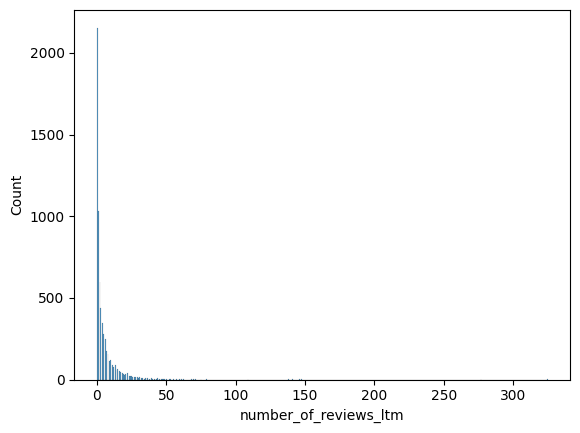

In [47]:
sns.histplot(df['number_of_reviews_ltm'])
plt.show()

Yearly Availability distribution

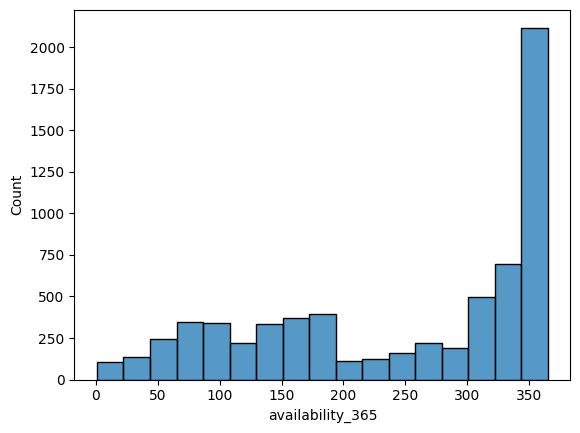

In [48]:
sns.histplot(df['availability_365'])
plt.show()

Breakdown of room types used in dataset

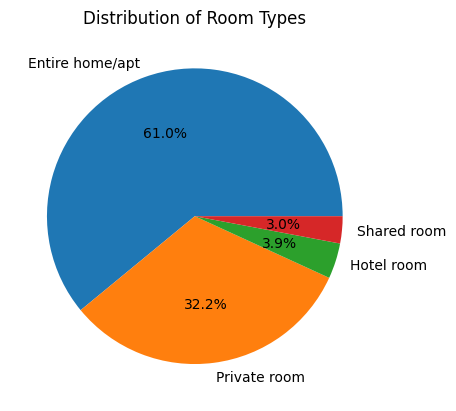

In [49]:
room_type_counts = df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Room Types')
plt.show()

Breakdown of top 10 neighborhoods

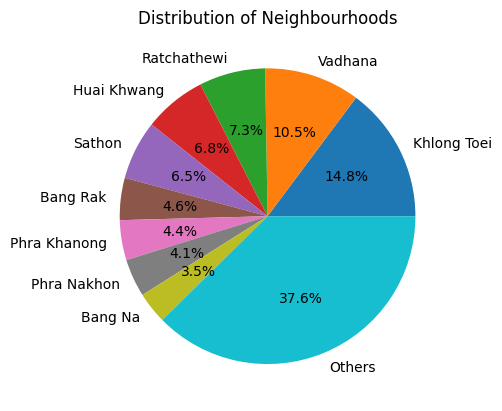

In [50]:
neighbourhood_counts = df['neighbourhood'].value_counts()
top_n = 9
top_counts = neighbourhood_counts[:top_n]
others_count = neighbourhood_counts[top_n:].sum()
top_counts['Others'] = others_count
plt.pie(top_counts, labels=top_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Neighbourhoods')
plt.show()

## Correlation heatmap useful for identifying relationship between numerical values

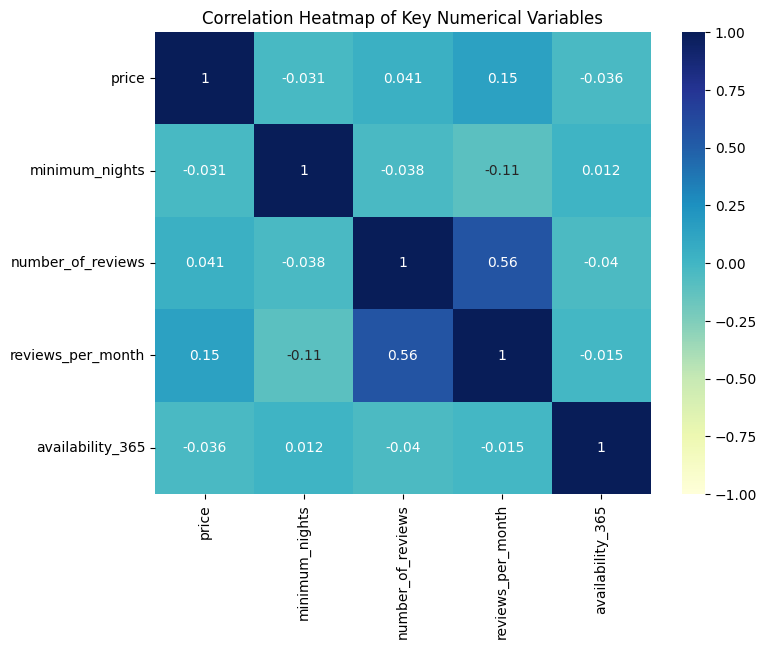

In [51]:
## Create heatmap correlations between key numerical variables
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
corr = df[numeric_cols].corr()
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Numerical Variables')
plt.show()

### Visualization for distribution of listings accross maps

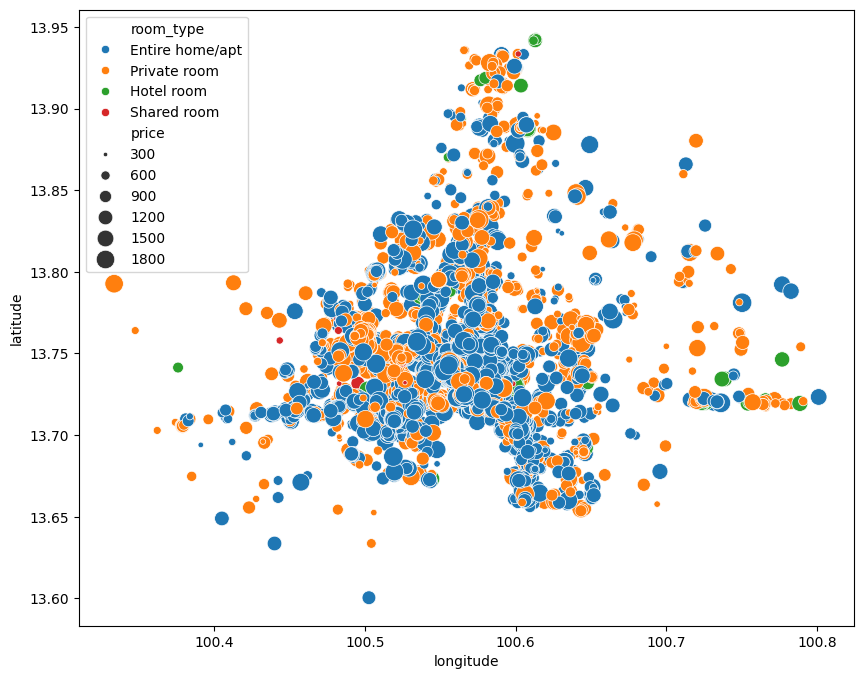

In [52]:
## Visualize the data on the maps
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type', size='price', sizes=(10, 200))
plt.show()

## Group bar chart to provide insight between room types, and host types

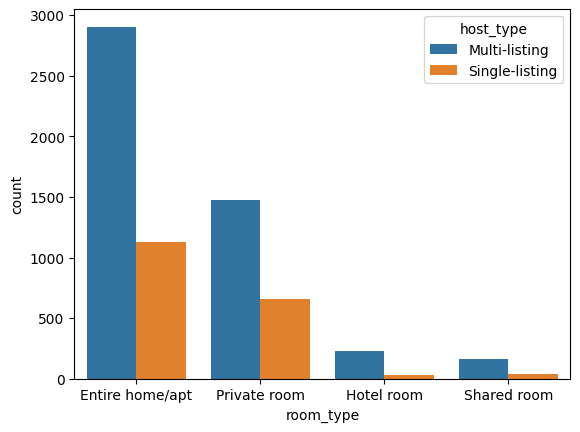

In [53]:
sns.countplot(x='room_type', hue='host_type', data=df)
plt.show()

## Scatterplot and regplot to Visualize correlation between two numerical values

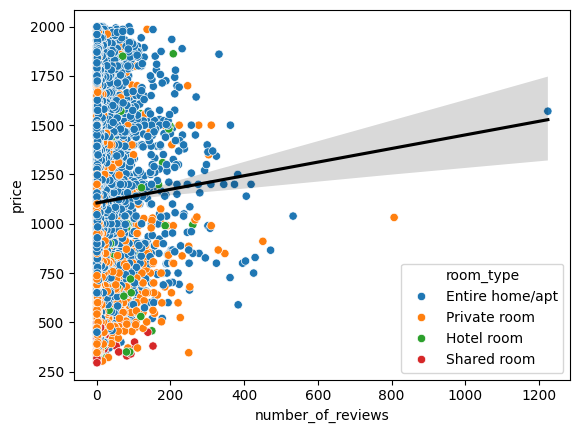

In [54]:
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=df)
sns.regplot(x='number_of_reviews', y='price', data=df, scatter=False, color='black')
plt.show()

## `V. Business Analysis` : Answering business Question
## Question 1: Pricing Strategy for budget travellers

- How does price relate to booking success?
- Does minimum_nights affect review frequency?
- Price differences by room type and neighborhood

### I. How is correlation between price and reviews, reviews per month, and reviews last 12 month

Null hypothesis: There is no correlation between price and number of reviews, reviews per month, and number of reviews last 12 months

Alternative hypothesis: there is colleration between price and number of reviews, reviews per month, and number of reviews last 12 months

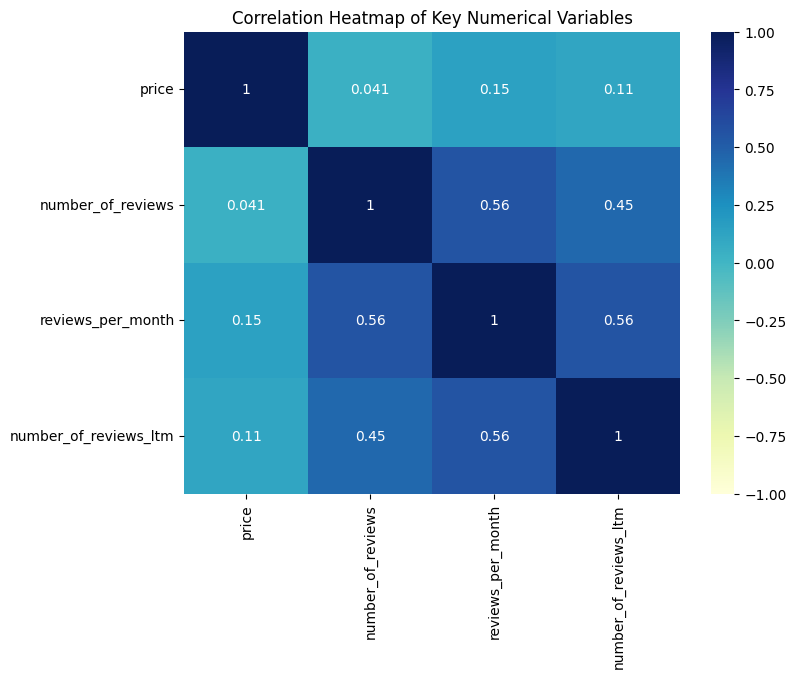

In [55]:
## Create heatmap correlations between key review variables
numeric_cols = ['price', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']
corr = df[numeric_cols].corr()
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Numerical Variables')
plt.show()

Corelation between 3 review metrics:

In [56]:
#Price and number of reviews
from scipy.stats import spearmanr
corr1, pval1 = spearmanr(df['reviews_per_month'], df['price'])
print(f"Correlation: {corr1:.3f}, p-value: {pval1:.4f}")

Correlation: 0.164, p-value: 0.0000


In [57]:
corr2, pval2 = spearmanr(df['number_of_reviews'], df['price'])
print(f"Correlation: {corr2:.3f}, p-value: {pval2:.4f}")

Correlation: 0.071, p-value: 0.0000


In [58]:
corr3, pval3 = spearmanr(df['number_of_reviews_ltm'], df['price'])
print(f"Correlation: {corr3:.3f}, p-value: {pval3:.4f}")

Correlation: 0.161, p-value: 0.0000


P-value has value less than 0.05 and correlation is more than 0. Hence, we reject the Ho meaning that price has positive corelation with reviews metrics

## **From here, concluded that reviews_per_month has highest correlation score (positively). Hence we use it for review metrics**

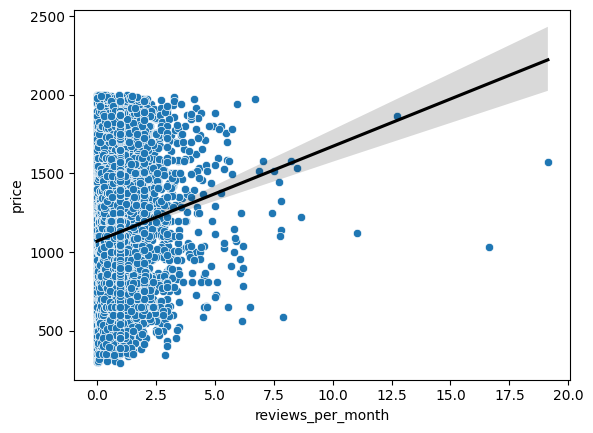

In [59]:
## Create scatterplot for price and reviews
sns.scatterplot(x='reviews_per_month', y='price', data=df)
sns.regplot(x='reviews_per_month', y='price', data=df, scatter=False, color='black')
plt.show()

## II Which price segment attracts more reviews?
### Inferential Statistic - Using ANOVA for reviews per month across price segment

Null Hypothesis: The mean reviews per month is the same across all price segments. In other words, price segment does not affect the reviews metrics per listing.

Alternative Hypothesis: At least one price segment has a different mean reviews per month, indicating a significant effect of price segment on review metrics.

In [60]:
from scipy.stats import f_oneway
groups = [group['reviews_per_month'].values for name, group in df.groupby('price_segment')]
f_stat, p_value = f_oneway(*groups)
print('F-statistic:', f_stat, 'p-value:', p_value)

F-statistic: 62.899107467306365 p-value: 8.704070456941455e-28


P-value has value less than 0.05. Hence, we reject the null hypothesis meaning there is significant effect of price segment on review metrics!

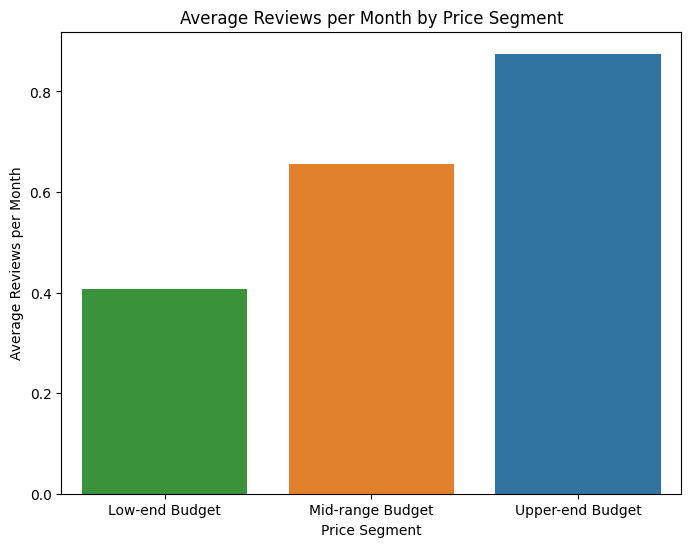

In [61]:
## bar plot showing reviews per month grouped by price segment
plt.figure(figsize=(8,6))
sns.barplot(x='price_segment', y='reviews_per_month', data=df, errorbar=None, hue='price_segment', order=['Low-end Budget', 'Mid-range Budget', 'Upper-end Budget'])
plt.xlabel('Price Segment')
plt.ylabel('Average Reviews per Month')
plt.title('Average Reviews per Month by Price Segment')
plt.show()

Upper-end budget segment has the highest average reviews per month compared to mid and lower end budget

### High vs lows price listings t test
Null hypothesis: There is no significant difference in the reviews per month between high price and low price listings.

Alternative hypothesis: There is significant difference in the reviews per month between high price and low price listings

In [62]:
high_price = df[df['price'] > df['price'].quantile(0.75)]['reviews_per_month']
low_price = df[df['price'] < df['price'].quantile(0.25)]['reviews_per_month']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(high_price, low_price)
print(f"T-test (High vs Low price): t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

T-test (High vs Low price): t-statistic: 10.622, p-value: 0.0000


p-value less than 0.05. Hence, we reject the null hypothesis. Which statistically significant difference in reviews score between high and low price listings

In [63]:
print(f"Average review per month: {df['reviews_per_month'].mean():.2f}, where the average reviews permonth for higher price point is {high_price.mean():.2f} and the average reviews permonth for lower price point is {low_price.mean():.2f}")

Average review per month: 0.76, where the average reviews permonth for higher price point is 0.96 and the average reviews permonth for lower price point is 0.58


It is concluded that higher price point attracts more reviews per month

## III How is price differences by room type and neighborhood?

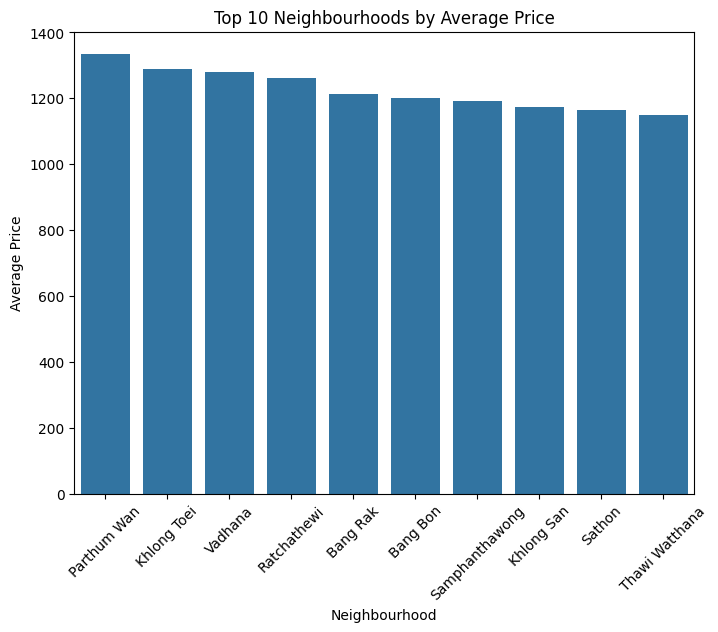

In [64]:
neighbourhood_price_tops = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
top_10_neighbourhoods_by_price = neighbourhood_price_tops.head(10).index

plt.figure(figsize=(8,6))
sns.barplot(x=top_10_neighbourhoods_by_price, y=neighbourhood_price_tops[top_10_neighbourhoods_by_price], order=top_10_neighbourhoods_by_price)
plt.xlabel('Neighbourhood')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.title('Top 10 Neighbourhoods by Average Price')
plt.show()

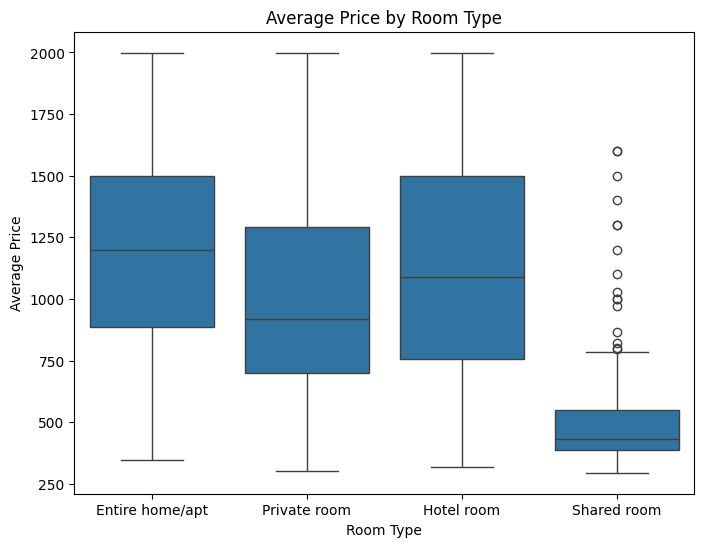

In [65]:
# Showing boxplot for average price grouped by room types
plt.figure(figsize=(8,6))
sns.boxplot(x='room_type', y='price', data=df)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

---

## Question 2: Geographic Situation for budget travellers

- Which neighbourhoods have the most listings and highest average prices?
- Which neighbourhoods have the highest booking frequency by number of reviews?
- How is correlation between location and review count

### I. Which neighborhoods have the most listings and highest price?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


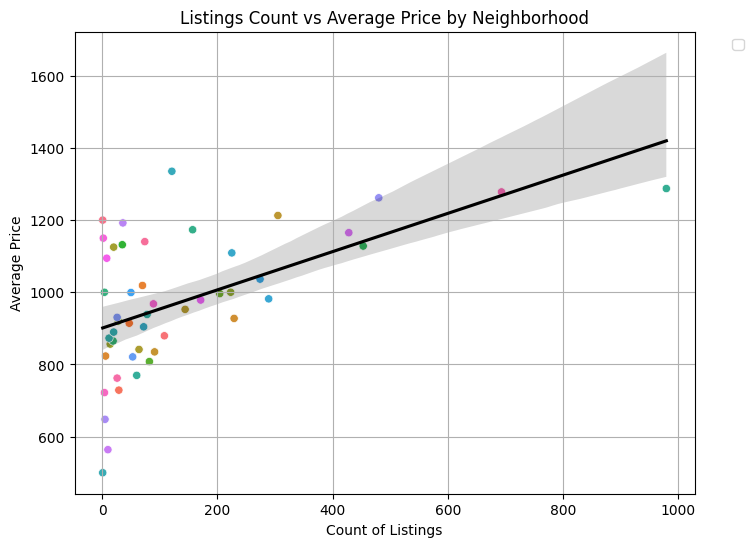

In [66]:
## Showing scatterplot for count of listings and average price grouped by neighborhood
# Group by 'neighborhood'
summary = df.groupby('neighbourhood').agg(count_listings=('price', 'size'), avg_price=('price', 'mean')).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(x='count_listings', y='avg_price', data=summary, hue='neighbourhood', legend=False)
sns.regplot(x='count_listings', y='avg_price', data=summary,scatter=False, color='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Count of Listings')
plt.ylabel('Average Price')
plt.title('Listings Count vs Average Price by Neighborhood')
plt.grid(True)
plt.show()

### How is the correlation between those two?

Null hypothesis: There is no correlation between count of listings and average price

Alternative hypothesis: there is colleration between count of listings and average price

In [ ]:
#Find correlation in summary between count of listings and average price
correlation, p_value = spearmanr(summary['count_listings'], summary['avg_price'])
print(f"Correlation: {correlation:.3f}, p-value: {p_value:.4f}")

Correlation: 0.486, p-value: 0.0004


Since P-value less than 0.05, we reject null hyphothesis meaning there is corellation between number of listings and average pricing

Since we know that number of listing correlates with number of listing, 5 neighborhoods that has highest number of listing with highest price point is: **Khlong Toei, Vadhana, Ratchathewi, Huai Khwang, and Sathon**

In [68]:
#Find 5 neighbourhood that has the highest number of listings / count of listings
top_10_neighbourhood_by_listings = summary.sort_values(by='count_listings', ascending=False).iloc[0:10]['neighbourhood']
print(f"Neighbourhood with the highest number of listings: {top_10_neighbourhood_by_listings}")

Neighbourhood with the highest number of listings: 22     Khlong Toei
46         Vadhana
36     Ratchathewi
18     Huai Khwang
40          Sathon
8         Bang Rak
31    Phra Khanong
32     Phra Nakhon
6          Bang Na
30      Phaya Thai
Name: neighbourhood, dtype: object


### II. Which neighbourhoods have the highest booking frequency by number of reviews?

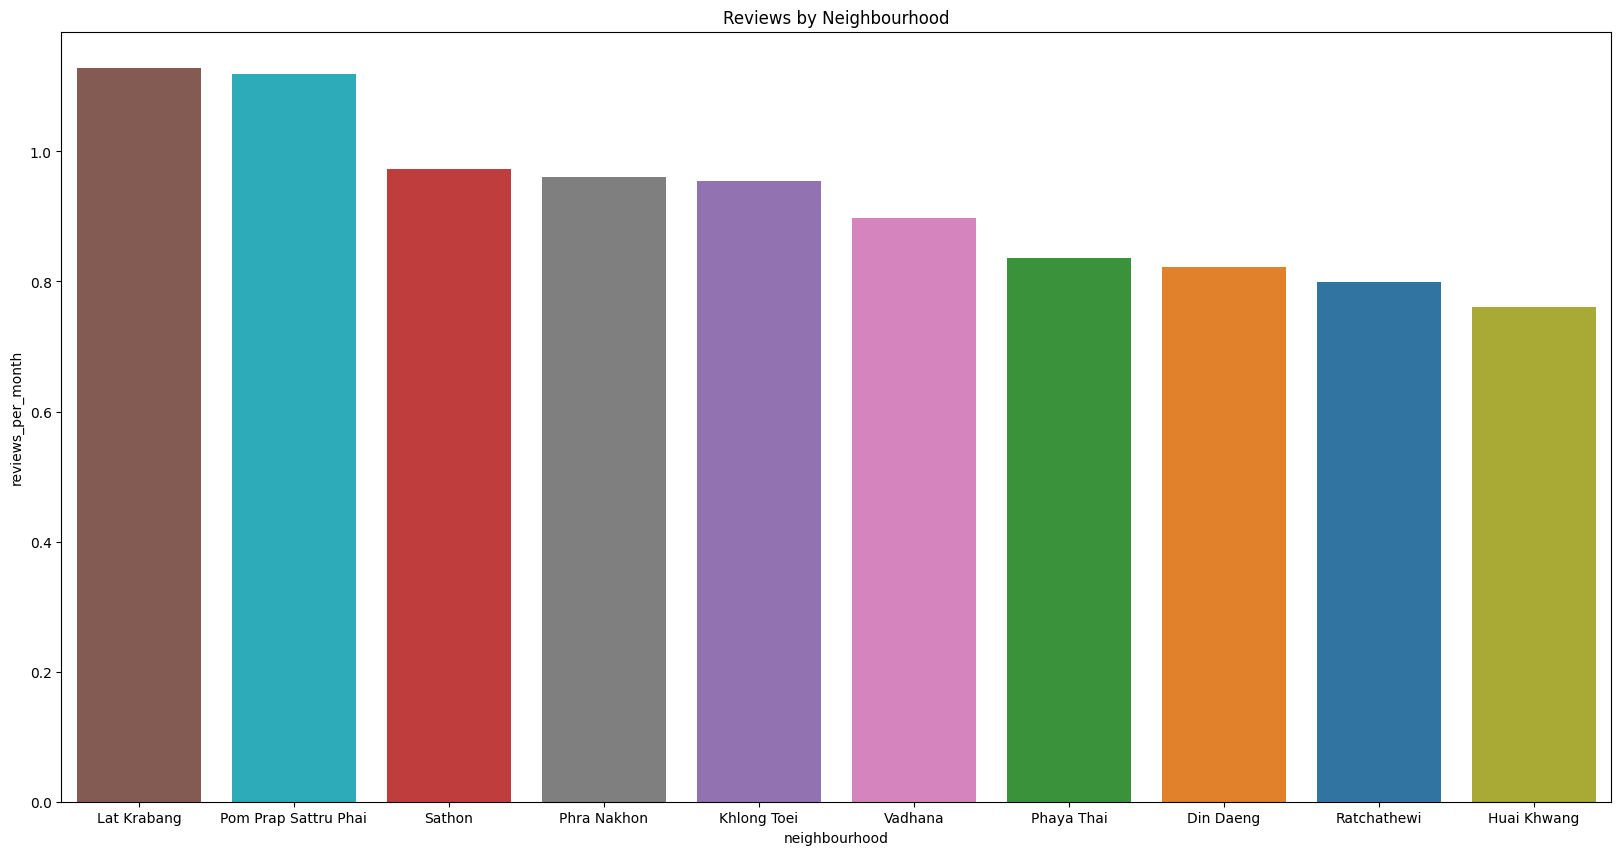

In [69]:
#Find correlation wether there is a relationship between reviews and neighbourhood (top 10 neighbourhoods)
neighbourhood_reviews = df.groupby('neighbourhood')['reviews_per_month'].mean().sort_values(ascending=False)
top_10_neighbourhoods = neighbourhood_reviews.head(10).index
df_top10 = df[df['neighbourhood'].isin(top_10_neighbourhoods)]
plt.figure(figsize=(20, 10))
sns.barplot(x='neighbourhood', y='reviews_per_month', data=df_top10 ,errorbar=None, order=top_10_neighbourhoods, hue='neighbourhood')
plt.title('Reviews by Neighbourhood')
plt.show()

According to the graph, the neighborhood that has highes number of reviews per month is Lat Krabang, Pom prap Sattru Phai, Sathon, Phra Nakhon, and Khlong Toei

## III. Relationship between neighborhoods and average reviews across neighborhoods
### Inferential Statistic - Using ANOVA for reviews across top neighborhoods

Ho = There is no significant difference in average reviews across neighborhoods

Ha = There is a significant difference in average reviews across different neighbourhoods in Bangkok.

If p-value < 0.05: Reject H₀ → Neighbourhoods significantly differ in average reviews (some neighbourhoods are indeed better performing)

If p-value ≥ 0.05: Fail to reject H₀ → No significant difference in average reviews across neighbourhoods

In [ ]:
#Corelation between neighborhoods and reviews score
groups = [df[df['neighbourhood'] == neighbourhood]['reviews_per_month'] for neighbourhood in top_10_neighbourhoods]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.4f}")

ANOVA F-statistic: 2.494, p-value: 0.0077


`Summary`:P Value less than 0.05. Hence we reject null hypothesis which means neighborhoods significantly differ in average reviews

---

# Question 3: Market Competition

- Do hosts with multiple listings tends to get more review?
- What is the proportion of high reviews segment and low review segment across different type of rooms?
- Do minimum night policy affects reviews variable?
- Do highly available listings get fewer reviews?

### I. Do hosts with multiple listings tends to get more review?

In [71]:
high_performers = df[df['reviews_per_month'] > df['reviews_per_month'].median()]
low_performers = df[df['reviews_per_month'] < df['reviews_per_month'].median()]

In [72]:
#Create data sets segmentation for high reviews and low reviews in df
# Create a price segment column based on reviews_per_month median
df['reviews_segment'] = df['reviews_per_month'].apply(lambda x: 'high review segment' if x > df['reviews_per_month'].median() else 'low review segment')

## Performing Chi Test for low and high reviews by host

Null hypothesis: There is no association between host type (Single-listing vs Multi-listing) and listing reviews group (High vs Low performer). 

Alternative Hypothesis: There is an association between host type and listing reviews group. Host type distribution depends on whether the listing is a high or low performer.

In [73]:
from scipy.stats import chi2_contingency
import numpy as np
# Create contingency table
high_perf_single = len(high_performers[high_performers['host_type'] == 'Single-listing'])
high_perf_multi = len(high_performers[high_performers['host_type'] == 'Multi-listing'])
low_perf_single = len(low_performers[low_performers['host_type'] == 'Single-listing'])
low_perf_multi = len(low_performers[low_performers['host_type'] == 'Multi-listing'])

contingency_table = np.array([[high_perf_single, high_perf_multi], 
                               [low_perf_single, low_perf_multi]])

# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2_stat:.3f}, p-value: {p_value:.4f}")

Chi-squared statistic: 159.007, p-value: 0.0000


p-value is less than 0.05 meaning reject null hypothesis. Hence: There is an association between host type and listing reviews group

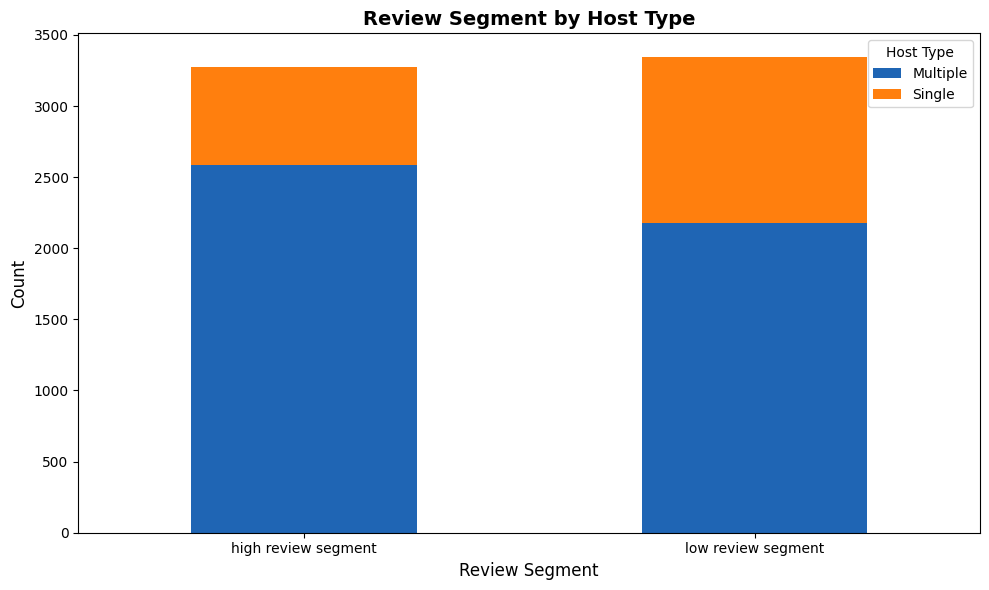

In [74]:
ct = pd.crosstab(df['reviews_segment'], df['host_type'])

# Create stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 6), color=["#1f65b4", '#ff7f0e'])

plt.xlabel('Review Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review Segment by Host Type', fontsize=14, fontweight='bold')
plt.legend(title='Host Type', labels=['Multiple', 'Single'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

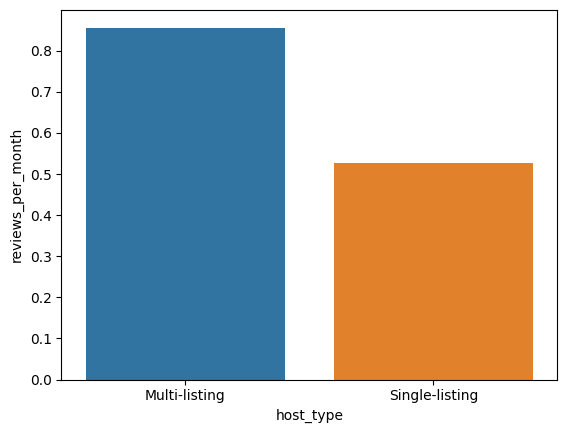

In [75]:
##overall reviews count by host types
sns.barplot(x='host_type', y='reviews_per_month', data=df, errorbar=None,hue='host_type')
plt.show()


From the visualization, multi-host listing more dominating in high frequency reviews compared to lower one

### II. Room types distribution and its review segment

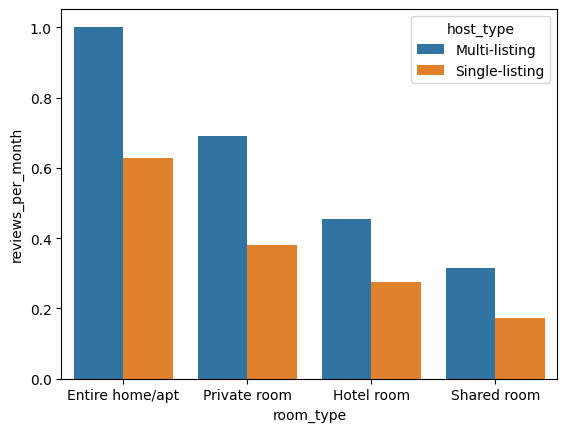

In [76]:
#price per room type by host types
sns.barplot(x='room_type', y='reviews_per_month', hue='host_type', data=df,errorbar=None)
plt.show()

In [77]:
high_perf_sharedrooms = len(high_performers[high_performers['room_type'] == 'Shared room'])
high_perf_hotels = len(high_performers[high_performers['room_type'] == 'Hotel room'])
high_perf_Private = len(high_performers[high_performers['room_type'] == 'Private room'])
high_perf_entire = len(high_performers[high_performers['room_type'] == 'Entire home/apt'])
low_perf_sharedrooms = len(low_performers[low_performers['room_type'] == 'Shared room'])
low_perf_hotels = len(low_performers[low_performers['room_type'] == 'Hotel room'])
low_perf_Private = len(low_performers[low_performers['room_type'] == 'Private room'])
low_perf_entire = len(low_performers[low_performers['room_type'] == 'Entire home/apt'])

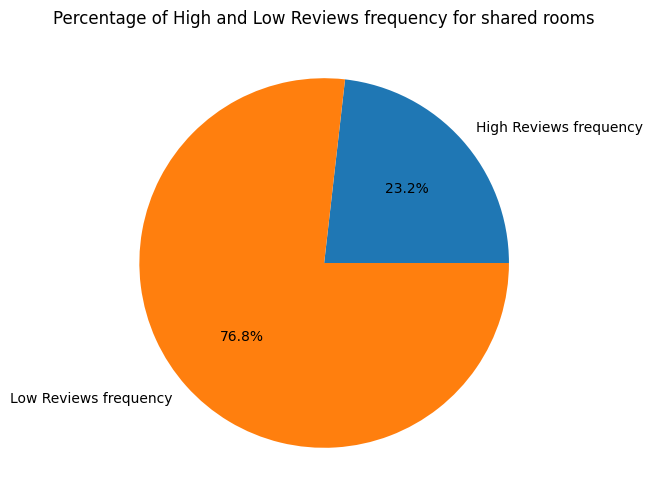

In [78]:
#Create a pie chart to show high reviews and low reviews percentages in shared rooms
labels = ['High Reviews frequency', 'Low Reviews frequency']
values = [high_perf_sharedrooms, low_perf_sharedrooms]
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of High and Low Reviews frequency for shared rooms')
plt.show()

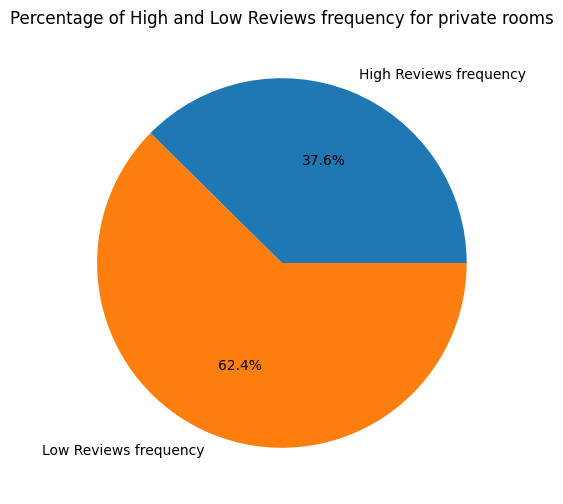

In [79]:
#Create a pie chart to show high reviews and low reviews percentages in private rooms
labels = ['High Reviews frequency', 'Low Reviews frequency']
values = [high_perf_Private, low_perf_Private]
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of High and Low Reviews frequency for private rooms')
plt.show()

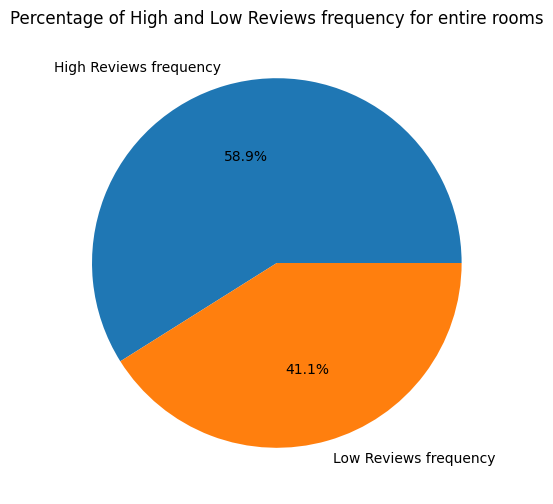

In [80]:
#Create a pie chart to show high reviews and low reviews percentages in entire place
labels = ['High Reviews frequency', 'Low Reviews frequency']
values = [high_perf_entire, low_perf_entire]
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of High and Low Reviews frequency for entire rooms')
plt.show()

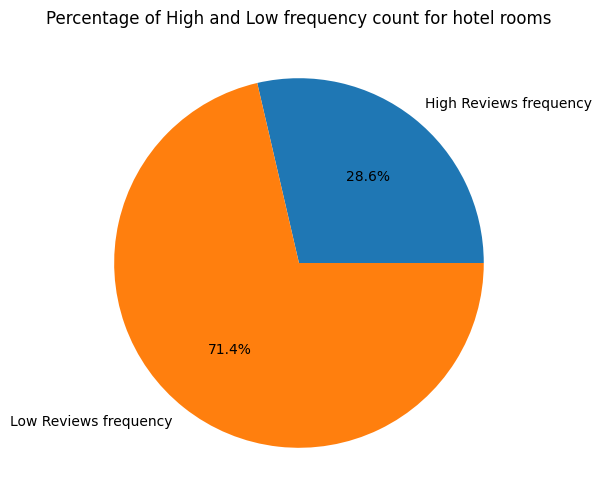

In [81]:
#Create a pie chart to show high reviews and low reviews percentages in hotel rooms
labels = ['High Reviews frequency', 'Low Reviews frequency']
values = [high_perf_hotels, low_perf_hotels]
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of High and Low frequency count for hotel rooms')
plt.show()

### III. Do minimum night policy affects reviews variable?

Null hypothesis = minimum night does not correlate with reviews count

Alternative hypothesis = minimum night does correlate with review count

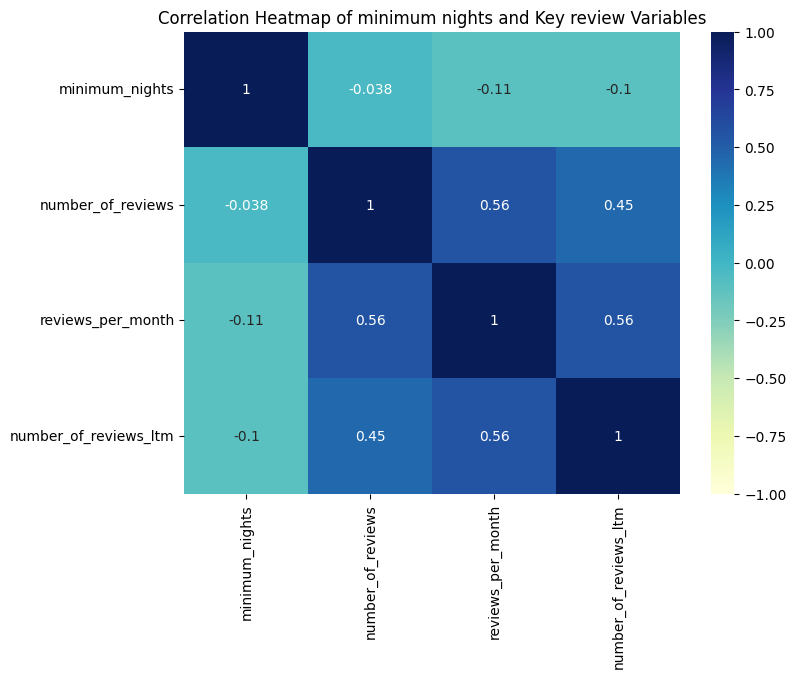

In [82]:
numeric_cols1 = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']
corr = df[numeric_cols1].corr()
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of minimum nights and Key review Variables')
plt.show()

In [83]:
corr, p_val = spearmanr(df['minimum_nights'], df['reviews_per_month'])
print(f'Spearman correlation: {corr:.3f}, p-value: {p_val:.3f}')


Spearman correlation: -0.081, p-value: 0.000


p value less than 0.05 and spearman correlation negative. Hence there is negative correlation between minimum night and reviews

### IV. Do highly available listings get fewer reviews?

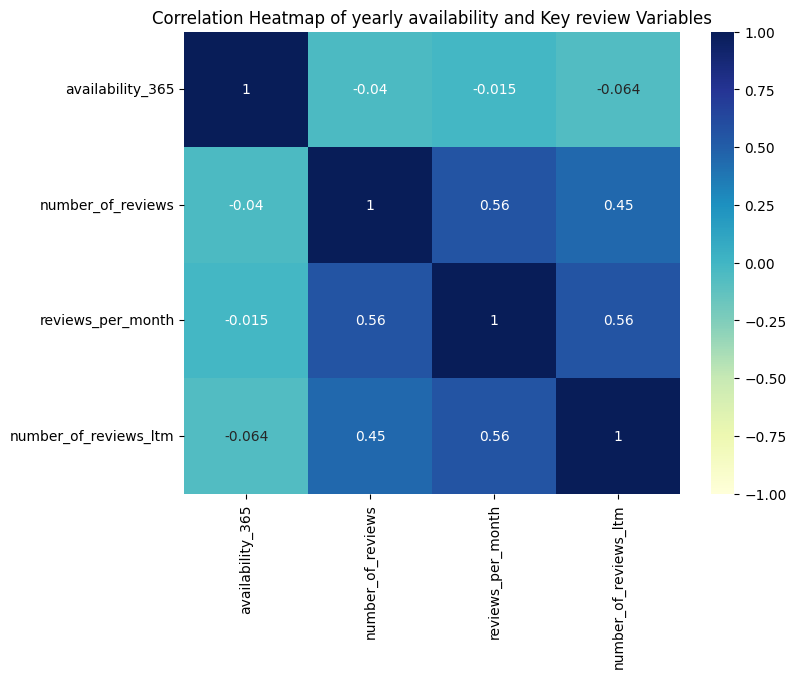

In [84]:
numeric_cols2 = ['availability_365', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']
corr = df[numeric_cols2].corr()
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of yearly availability and Key review Variables')
plt.show()

### For availability we use number of reviews last year so the unit is the same

Null hypothesis = yearly availability does not correlate with reviews count

Alternative hypothesis = yearly availability does correlate with review count

In [85]:
## do a correlation between availability_365 and number_of_reviews
corr, p_val = spearmanr(df['availability_365'], df['number_of_reviews'])
print(f'Spearman correlation: {corr:.3f}, p-value: {p_val:.3f}')

Spearman correlation: -0.167, p-value: 0.000


Since p-value less than 0.05 and correlation is less than 0. Meaning that yearly availability could meaning lacks of reviews performance

# VI Conclusion
`Market is segmented, not monolithic` Entire homes ≠ shared rooms in pricing/performance

`Location matters more for budget options` Central Bangkok attracts diverse segment from budget to premium

`Professional scale wins in high-performance` Hosts with multi-listing hosts dominate, but niches exist for single operators

`Shared rooms = untapped opportunity` Underperforming segment with backpacker appeal mismatch

`Flexibility drives velocity` 1-night minimums crucial for high-review, high-turnover success


## **Business suggestion**
- The shared rooms, private rooms, and hotels sectors has been lacking in review compared to saturated entire rooms sectors. Lots of improvement needed for shared rooms.
- The key to attracts more costumers (by review metrics) is lesser minimum nights requirements, higher price point which might attracts more segment other than backpackers.
- The higher yearly availability might indicating lacking occupancy. Service improvement or more marketing needed!
- top 5 neighborhoods that attracts more booking that is constantly appears in both geographic case study including Khlong Toei, Vardhana, Sathon, Phra Nakhron, Phaya Thai which is mainly located on the central business district.